In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
listItem = []
for col in train.columns :
    listItem.append([col, train[col].dtype, train[col].isna().sum(), round((train[col].isna().sum()/len(train[col])) * 100,2),
                    train[col].nunique(), list(train[col].unique()[:2])]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Id,int64,0,0.00,1460,"[1, 2]"
1,MSSubClass,int64,0,0.00,15,"[60, 20]"
2,MSZoning,object,0,0.00,5,"[RL, RM]"
3,LotFrontage,float64,259,17.74,110,"[65.0, 80.0]"
4,LotArea,int64,0,0.00,1073,"[8450, 9600]"
5,Street,object,0,0.00,2,"[Pave, Grvl]"
6,Alley,object,1369,93.77,2,"[nan, Grvl]"
7,LotShape,object,0,0.00,4,"[Reg, IR1]"
8,LandContour,object,0,0.00,4,"[Lvl, Bnk]"
9,Utilities,object,0,0.00,2,"[AllPub, NoSeWa]"


In [9]:
def detect_outliers(df, n, features):
    """
    Takes a dataframe df of features and returns a list of indices
    correspoding to the observations containing more than n outliers according
    to the Turkey Method
    """
    outlier_id = []
    features_upper_outlier = []
    features_bottom_outlier = []
    
    # iterate over features
    for col in features:
        # first quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # third quartile (75%)
        Q3 = np.percentile(df[col], 75)
        
        IQR = Q3 - Q1
        
        # outlier step (Turkey Method)
        outlier_step = 1.5 * IQR
        features_upper_outlier.append(Q3 + outlier_step)
        features_bottom_outlier.append(Q1 - outlier_step)
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]['Id']
        
        outlier_id.extend(outlier_list_col)
        
    outlier_id_counter = Counter(outlier_id)
    multiple_outliers = list( k for k, v in outlier_id_counter.items() if v > n)
    
    return multiple_outliers

In [10]:
dfDesc[dfDesc['dataType'] == 'O']['dataFeatures'].values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [11]:
basic_numerical_features = train.drop(['Id','SalePrice'], axis=1).select_dtypes(exclude=['object']).columns
outliers_to_drop = detect_outliers(train, 3, basic_numerical_features)

In [12]:
id_to_drop = train[(train['Id'].isin(outliers_to_drop))].Id.tolist()

In [13]:
train = train[~train['Id'].isin(id_to_drop)]

In [14]:
data = pd.concat((train, test)).reset_index(drop=True)
data.shape

(2866, 81)

In [15]:
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].unique()[:2])]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,1stFlrSF,int64,0,0.00,1061,"[856, 1262]"
1,2ndFlrSF,int64,0,0.00,611,"[854, 0]"
2,3SsnPorch,int64,0,0.00,30,"[0, 320]"
3,Alley,object,2673,93.27,2,"[nan, Grvl]"
4,BedroomAbvGr,int64,0,0.00,7,"[3, 4]"
5,BldgType,object,0,0.00,5,"[1Fam, 2fmCon]"
6,BsmtCond,object,79,2.76,4,"[TA, Gd]"
7,BsmtExposure,object,79,2.76,4,"[No, Gd]"
8,BsmtFinSF1,float64,1,0.03,975,"[706.0, 978.0]"
9,BsmtFinSF2,float64,1,0.03,262,"[0.0, 668.0]"


ValueError: cannot convert float NaN to integer

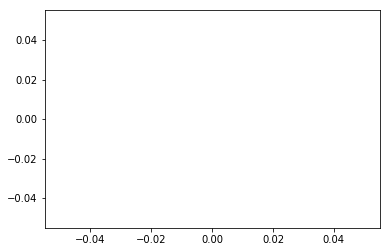

In [16]:
sns.distplot(data['SalePrice'])

In [ ]:
df_numerical = data[dfDesc[(dfDesc['unique'] > 15) & ((dfDesc['dataType'] == 'int64') | (dfDesc['dataType'] == 'float64'))]['dataFeatures'].values]
len(df_numerical.columns)

In [ ]:
for col in df_numerical.columns:
    sns.jointplot(col,'SalePrice', data=data, kind='scatter')

In [ ]:
df_ordinal = data[dfDesc[(dfDesc['unique'] <= 15) & ((dfDesc['dataType'] == 'int64') | (dfDesc['dataType'] == 'float64'))]['dataFeatures'].values]
len(df_ordinal.columns)

In [ ]:
fig, axs = plt.subplots(8,2, figsize=(12,50))
columns = df_ordinal.columns
for col, num in zip(columns, range(1,len(columns)+1)):
    plt.subplot(8,2,num)
    sns.boxplot(col, 'SalePrice', data=data, palette='winter')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), vmax=.8, square=True)

In [ ]:
corr_matrix = data.corr()
cols = corr_matrix.nlargest(15, 'SalePrice')['SalePrice'].index
corr_mat = data[cols].corr()
plt.figure(figsize=(15,10))
# sns.set(font_scale=1.25)
sns.heatmap(corr_mat, annot=True, vmax=.8, cbar=True, yticklabels=cols.values, xticklabels=cols.values)

In [ ]:
sns.pairplot(data[cols])

In [ ]:
numerical_features = cols.tolist()

In [ ]:
dfDesc[dfDesc['null'] > 0].sort_values('null', ascending=False)

In [ ]:
len(dfDesc[dfDesc['null'] > 0].sort_values('null', ascending=False)['dataFeatures'])

In [ ]:
data = data.drop(['Id, PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageType',
                    'GarageYrBlt','GarageFinish','BsmtExposure','BsmtFinType2','BsmtFinType1'],axis=1)

In [ ]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
for col in ['GarageQual','GarageCond','BsmtQual','BsmtCond','MasVnrType']:
    data[col] = data[col].fillna('None')

In [ ]:
data = data.drop(data[data['Electrical'].isnull()].index)

In [ ]:
data.isnull().sum().max()

In [ ]:
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].unique()[:2])]);

new_dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
new_dfDesc

In [ ]:
new_dfDesc[new_dfDesc['dataType'] == 'O'].sort_values('unique')

In [ ]:
ordinal_features = ['KitchenQual','ExterQual','BsmtQual','BsmtCond','HeatingQC','ExterCond',
                    'GarageQual','GarageCond']

In [ ]:
cat_features = new_dfDesc[new_dfDesc['dataType'] == 'O']['dataFeatures']

In [ ]:
cat_features = cat_features[~cat_features.isin(ordinal_features)].values

In [ ]:
data[ordinal_features].head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ordinal_features:
    data[col] = le.fit_transform(data[col])

In [ ]:
data = pd.get_dummies(data, columns=cat_features)
data.head()

In [ ]:
data.info()

In [ ]:
cols = []
col = []
for col1 in cat_features:
    for col2 in data.columns:
        if col1.lower() in col2.lower():
            col.append(col2)
    if len(col) > 0:
        cols.append(col)
        col = []

In [ ]:
for col in cols:
    col.append('SalePrice')
    corr_mat = data[col].corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(corr_mat, annot=True, vmax=.8, cbar=True)

In [ ]:
cat_features = ['Neighborhood_NridgHt','Foundation_CBlock','Foundation_PConc','SaleType_New',
                'SaleCondition_Partial','MasVnrType_Stone']

In [ ]:
corr_mat = data[['SalePrice','KitchenQual','ExterQual','BsmtQual','BsmtCond','HeatingQC',
                      'ExterCond','GarageQual', 'GarageCond']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True, vmax=.8, cbar=True)

In [ ]:
ordinal_features = ['KitchenQual','ExterQual','BsmtQual','HeatingQC']

In [ ]:
numerical_features.remove('GarageYrBlt')
numerical_features.remove('SalePrice')
numerical_features

In [ ]:
features = []
for col in [numerical_features, ordinal_features, cat_features]:
    features.extend(col)

In [ ]:
data = data[features]
data.head()

In [ ]:
target = data['SalePrice']

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
def calc_train_error(X_train, y_train, model):
    # return in-sample error for already fit model
    
    predictions = model.predict(X_train)
    mae = mean_absolute_error(y_train, predictions)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, predictions)
    return {
        'mae' : mae,
        'mse' : mse,
        'rmse' : rmse,
        'r2' : r2
    }

def calc_validation_error(X_test, y_test, model):
    # return out of sample error for already fit model
    
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return {
        'mae' : mae,
        'mse' : mse,
        'rmse' : rmse,
        'r2' : r2
    }


def calc_metrics(X_train, y_train, X_test, y_test, model):
    # fits model and returns the classification metrics for in sample error and out of sample error
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    model = make_pipeline(RobustScaler(), LinearRegression())
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [ ]:
print('TRAIN SCORE')
print('MAE Score : {} \nMSE Score : {} \nRMSE Score : {} \nR2 Score : {}'.format(train_errors[mae],
                                                                                 train_errors[mse],
                                                                                 train_errors[rmse],
                                                                                 train_errors[r2]))